In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(open('nics-firearm-background-checks.csv'))
df.shape

(12540, 27)

In [3]:
def extract_year (input):
    return int(input.split('-')[0])

df['year'] = df['month'].apply(extract_year)

In [4]:
def create_dataframe(df, year, column):
    temp_df = df[df['year'] == year]
    state_count = {}
    for i, row in temp_df.iterrows():
        if row['state'] in state_count:
            state_count[row['state']] += int(row[column])
        else:
            state_count[row['state']] = int(row[column])
    new_df = pd.DataFrame([state_count])
    new_df = new_df.transpose()
    return new_df

In [5]:
df_2016_total = create_dataframe(df, 2016, 'totals')
df_2016_total_sorted = df_2016_total.sort_values(0)[::-1]

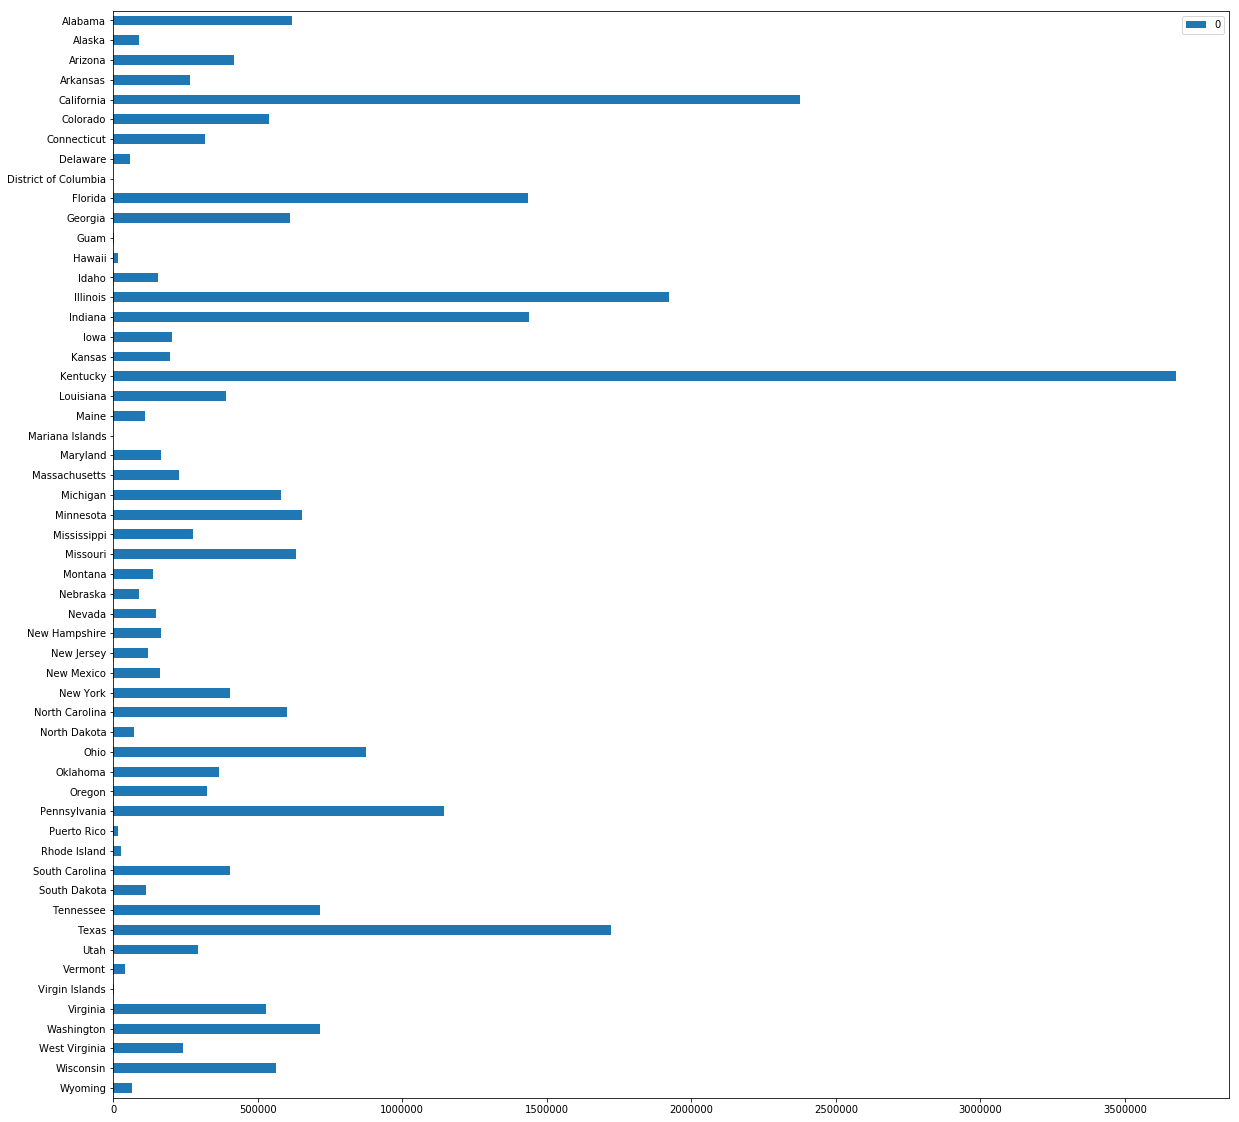

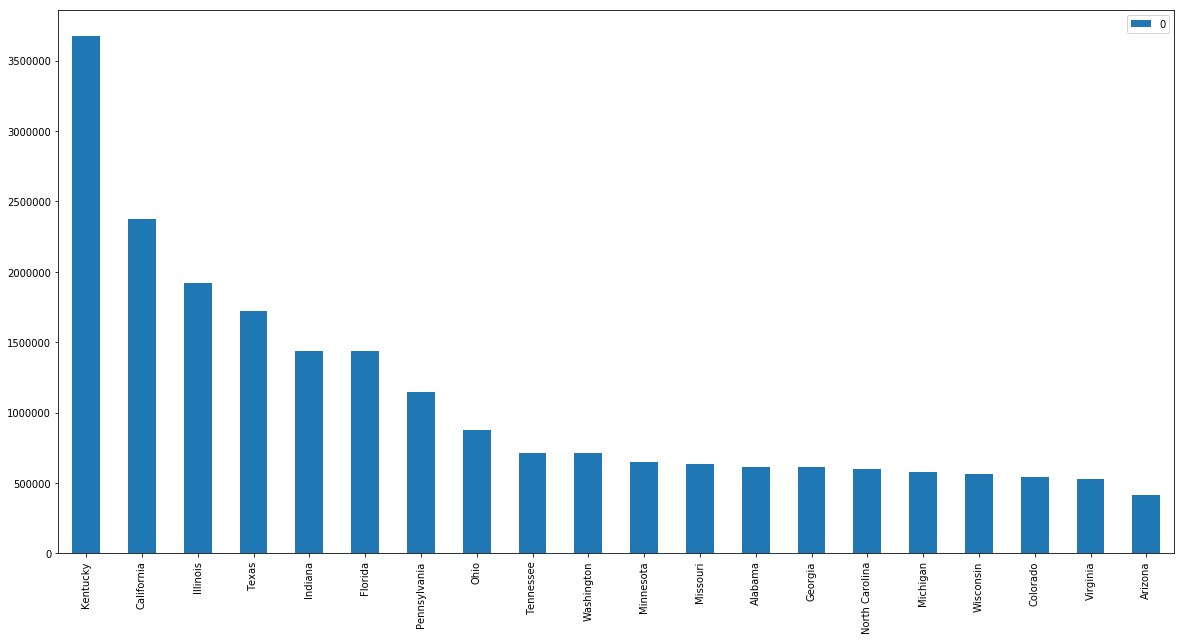

In [6]:
df_2016_total[::-1].plot(kind='barh', figsize=(20,20))
df_2016_total_sorted[:20].plot(kind='bar', figsize=(20,10))

In [7]:
df_2016_handgun = create_dataframe(df, 2016, 'handgun')
df_2016_handgun_sorted = df_2016_handgun.sort_values(0)[::-1]

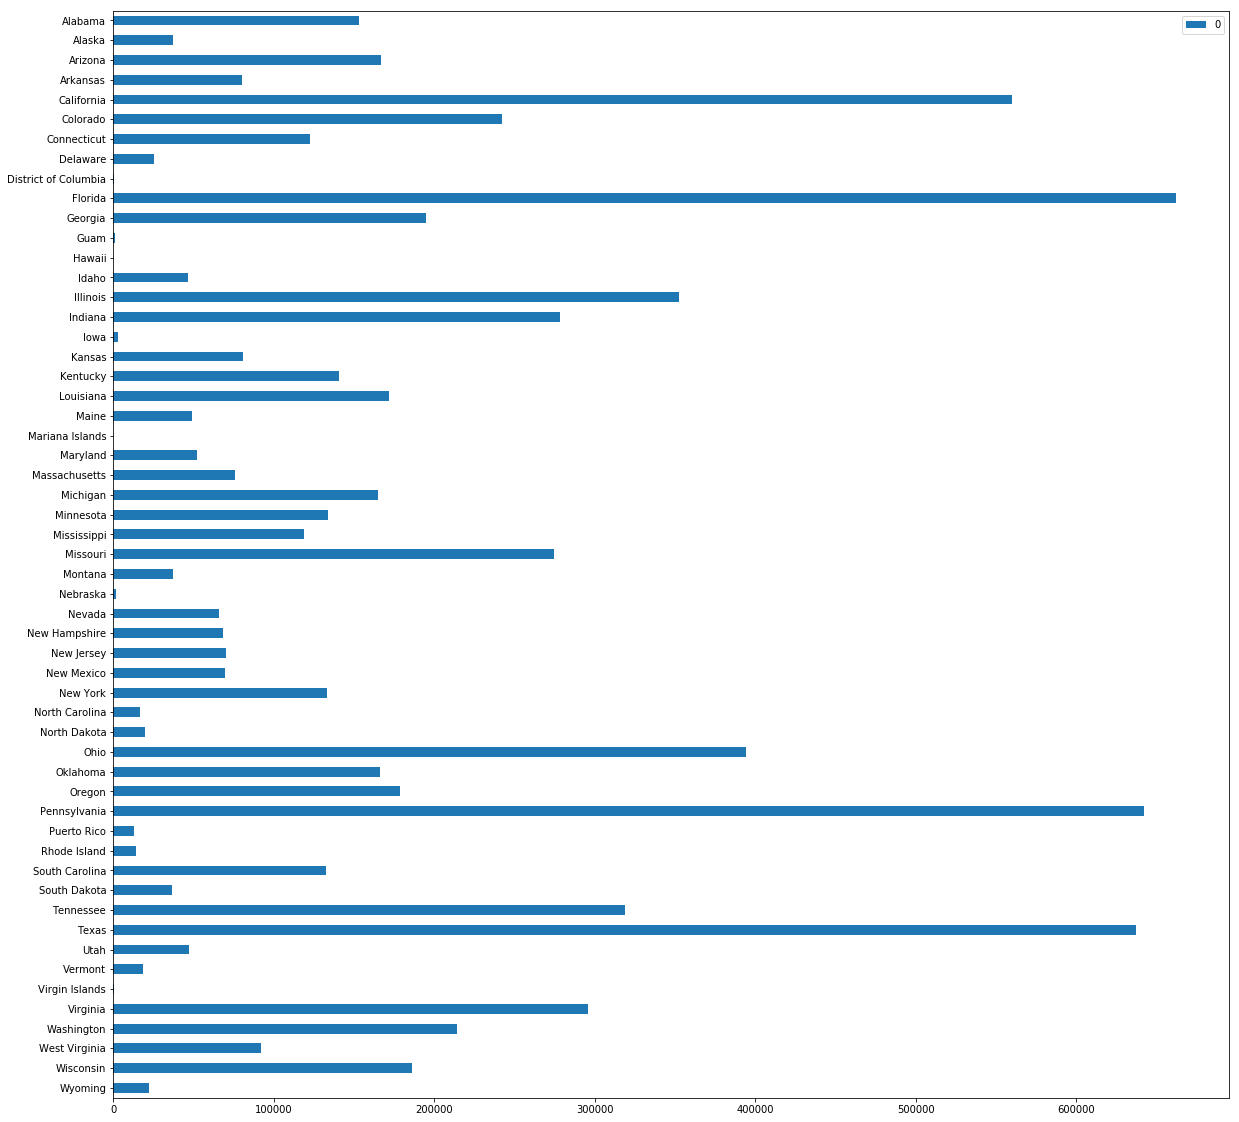

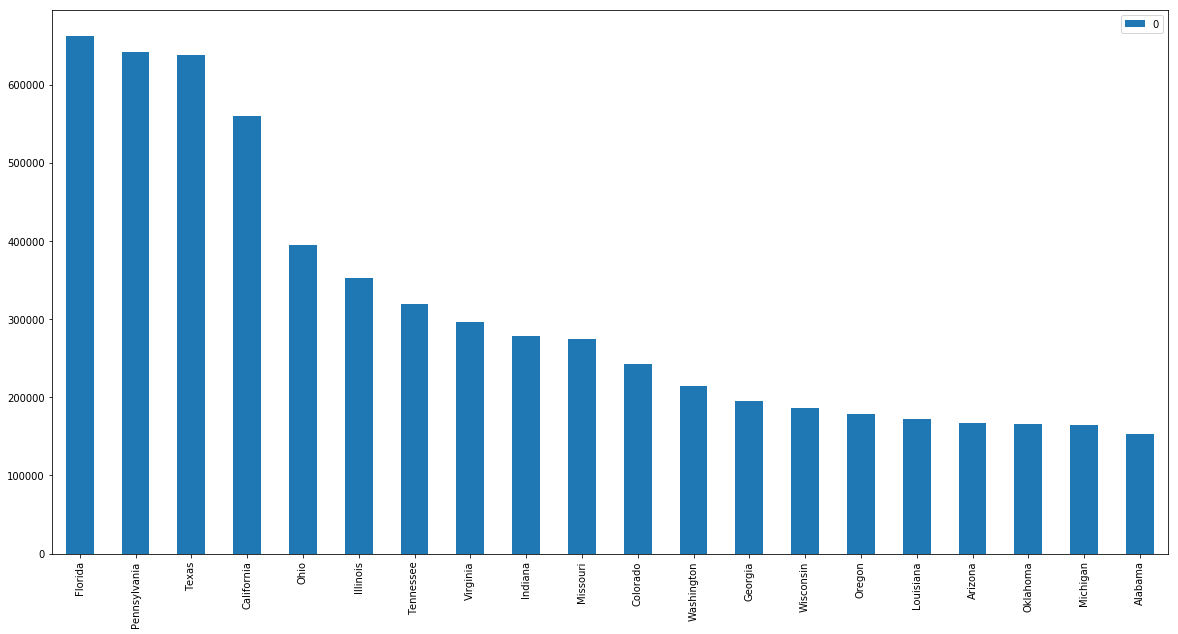

In [8]:
df_2016_handgun[::-1].plot(kind='barh', figsize=(20,20))
df_2016_handgun_sorted[:20].plot(kind='bar', figsize=(20,10))

In [9]:
df_2007_2016 = df[df['year'] >= 2007]
df_2007_2016 = df_2007_2016[df['year'] <= 2016]

/Users/DannyChan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [10]:
year_count_total = {}
year_count_handgun = {}
for i, row in df_2007_2016.iterrows():
    if row['year'] in year_count_total:
        year_count_total[row['year']] += int(row['totals'])
    else:
        year_count_total[row['year']] = int(row['totals'])
    if row['year'] in year_count_handgun:
        year_count_handgun[row['year']] += int(row['handgun'])
    else:
        year_count_handgun[row['year']] = int(row['handgun'])

      total_count
2007     11162272
2008     12692985
2009     13984953
2010     14320489
2011     16336732
2012     19463832
2013     20966704
2014     20860241
2015     23026288
2016     27425512


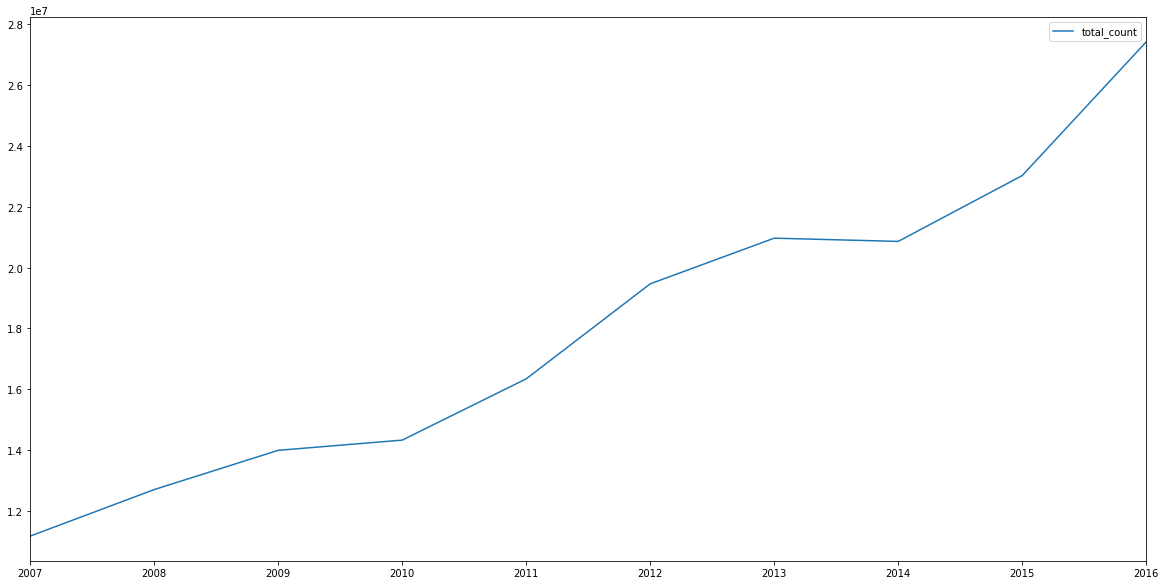

In [11]:
df_year_total = pd.DataFrame([year_count_total])
df_year_total = df_year_total.transpose()
df_year_total.columns = ['total_count']
print(df_year_total)
df_year_total.plot(figsize=(20,10))

      handgun_count
2007        2635629
2008        3331199
2009        3689604
2010        3678001
2011        4301389
2012        5682963
2013        6387502
2014        6199243
2015        7333808
2016        8085498


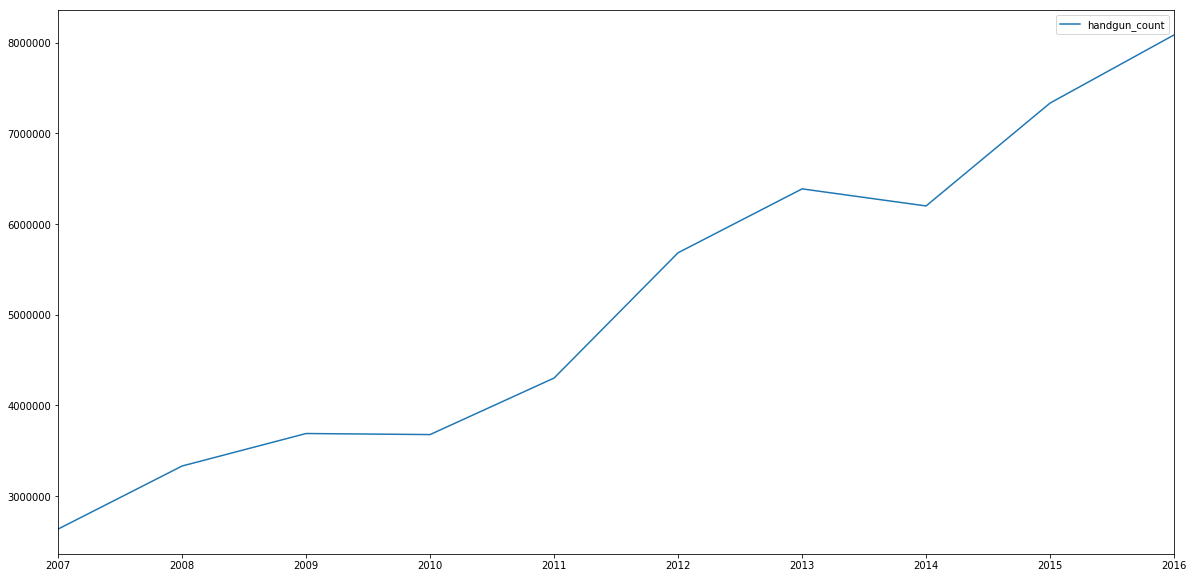

In [12]:
df_year_handgun = pd.DataFrame([year_count_handgun])
df_year_handgun = df_year_handgun.transpose()
df_year_handgun.columns = ['handgun_count']
print(df_year_handgun)
df_year_handgun.plot(figsize=(20,10))

In [13]:
df_shootings = pd.read_csv(open('shootings.csv'))
df_shootings

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN
2,"December 26, 2015",Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN
3,"December 25, 2015",Florida,Jacksonville,Franklin and Odessa,0,4,NaN
4,"December 25, 2015",Alabama,Mobile,785 Schillinger Rd S,0,4,NaN
5,"December 21, 2015",California,San Leandro,14600 block of East 14th Street,0,4,NaN
6,"December 20, 2015",North Carolina,Wilmington,11th and Castle Street,1,4,NaN
7,"December 20, 2015",Florida,Miami (Goulds),21630 Southwest 120th Avenue,1,4,NaN
8,"December 20, 2015",Florida,Miami-dade (county),Northeast Seventh Avenue and Northeast 166th S...,0,4,NaN
9,"December 13, 2015",California,Los Angeles,5550 S. Flower Street,1,3,NaN


In [14]:
incident_count = {}
affected_count = {}
for i, row in df_shootings.iterrows():
    if row['State'] in incident_count:
        incident_count[row['State']] += 1
    else:
        incident_count[row['State']] = 1
        
    if row['State'] in affected_count:
        affected_count[row['State']] += (int(row['# Killed']) + int(row['# Injured']))
    else:
        affected_count[row['State']] = (int(row['# Killed']) + int(row['# Injured']))
 

In [15]:
df_incident = pd.DataFrame([incident_count]).transpose()
df_affected = pd.DataFrame([affected_count]).transpose()

In [16]:
df_incident.columns = ['# Incident']
df_affected.columns = ['# Affected']

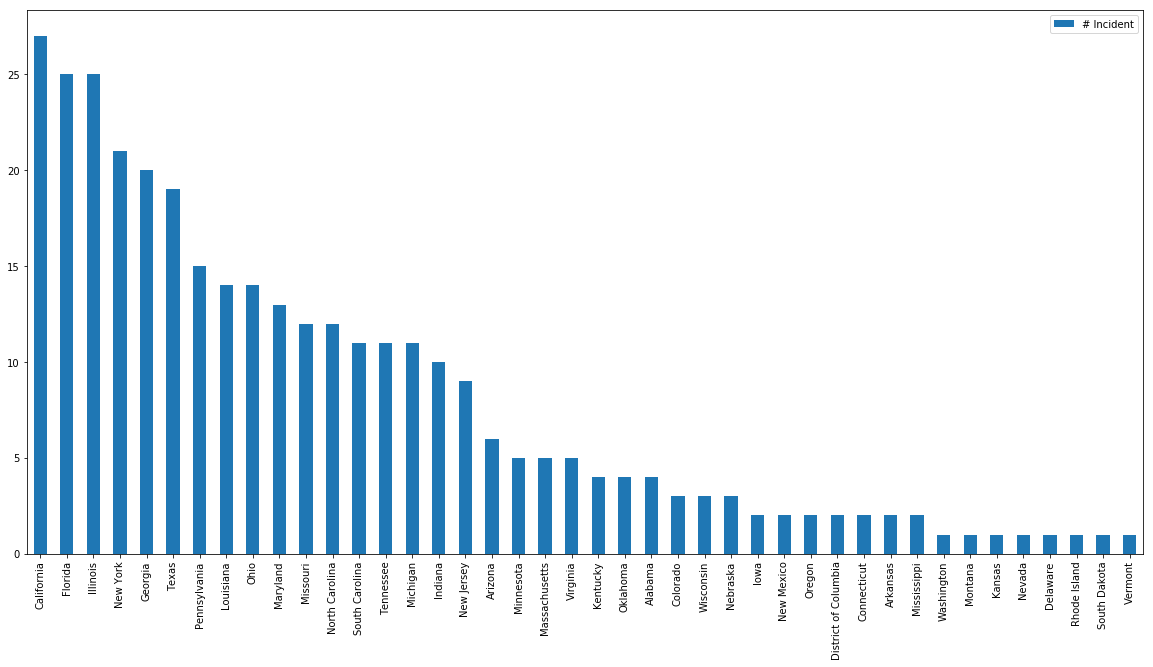

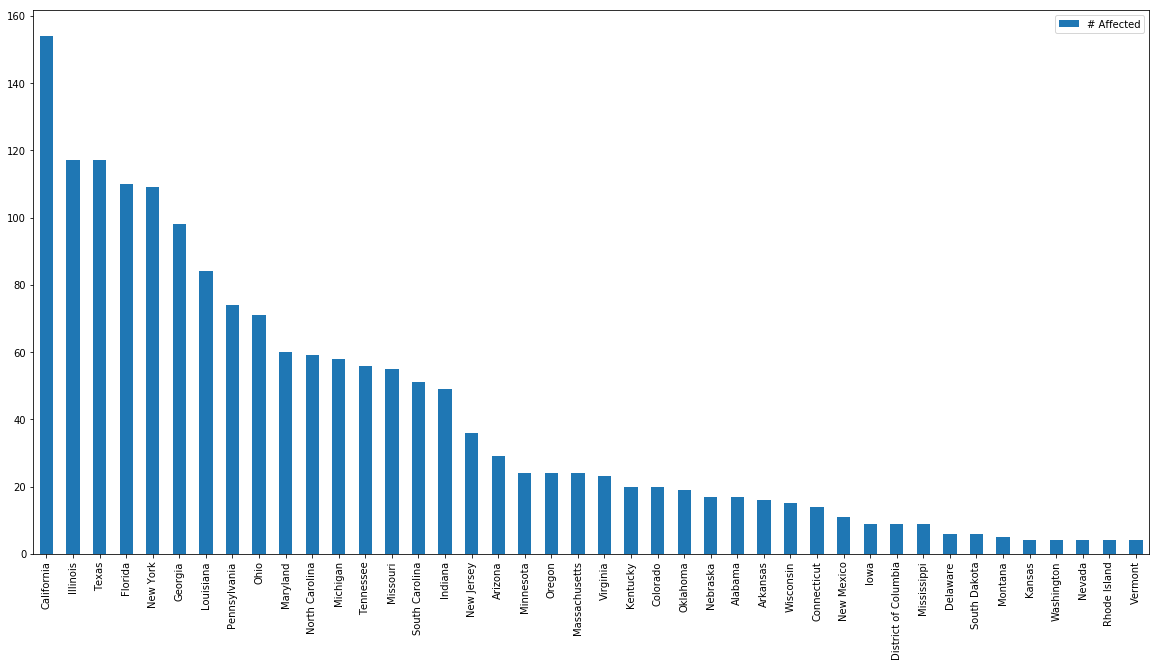

In [17]:
df_incident.sort_values('# Incident')[::-1].plot(kind='bar', figsize=(20,10))
df_affected.sort_values('# Affected')[::-1].plot(kind='bar', figsize=(20,10))